# $k$-meansと凝集型階層的クラスタリング

1. kk-meansを用いて4個のクラスタを作成し解釈する-(i)
1. 凝集型階層的クラスタリングを実行しデンドログラムを作成する
1. データ間の距離:ユークリッド距離(euclidean)
1. クラスタ間の距離:3種類についてデンドログラムを比較する
  - 単連結法(single)
  - 完全連結法(complete)
  - 群平均法(average)
5. 群平均法の結果から4個のクラスタを作成し解釈する-(ii)
1. (i)と(ii)を比較する

## $k$-means

$k$-means 法を用いて、4つのクラスタに分類する。

### `csv`データの読み込み

In [41]:
%pip install ptitprince

import pandas as pd
from sklearn.preprocessing import StandardScaler

# データ読込み
customer = pd.read_csv('data/customerData.txt')

#分析に使うデータを設定
customer_clustering = customer[["mean", "median","max", "min", "membership_period"]].copy()
customer_clustering.head()

# データ標準化
sc = StandardScaler()
customer_clustering_sc = sc.fit_transform(customer_clustering)

customer

,customer_id,mean,median,max,min,membership_period
0,OA832399,4.833333,5.0,8,2,47
1,PL270116,5.083333,5.0,7,3,47
2,OA974876,4.583333,5.0,6,3,47
3,HD024127,4.833333,4.5,7,2,47
4,HD661448,3.916667,4.0,6,1,47
...,...,...,...,...,...,...
4187,HD676663,8.000000,8.0,8,8,1
4188,HD246549,10.000000,10.0,10,10,1
4189,GD037007,8.000000,8.0,8,8,1
4190,OA953150,11.000000,11.0,11,11,1


### クラスタリング

In [40]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# kmeans実行
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit(customer_clustering_sc)
customer_clustering["cluster"] = clusters.labels_
print(customer_clustering["cluster"].unique())
customer_clustering

/workspaces/statistical-analysis/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[3 2 0 1]


,mean,median,max,min,membership_period,cluster
0,4.833333,5.0,8,2,47,3
1,5.083333,5.0,7,3,47,3
2,4.583333,5.0,6,3,47,3
3,4.833333,4.5,7,2,47,3
4,3.916667,4.0,6,1,47,3
...,...,...,...,...,...,...
4187,8.000000,8.0,8,8,1,1
4188,10.000000,10.0,10,10,1,1
4189,8.000000,8.0,8,8,1,1
4190,11.000000,11.0,11,11,1,1


### 得られたクラスタの分析

#### クラスタ内のデータの個数

空間濃縮や空間拡散が過度に発生していないことを確認する。

In [4]:
# クラスタ毎のデータ数を出力
customer_clustering.columns = ["月内平均値","月内中央値",
"月内最大値", "月内最小値","会員期間", "cluster"]
customer_clustering.groupby("cluster").count()

,月内平均値,月内中央値,月内最大値,月内最小値,会員期間
cluster,,,,,
0,1334,1334,1334,1334,1334
1,846,846,846,846,846
2,763,763,763,763,763
3,1249,1249,1249,1249,1249


#### クラスタごとの平均値

大まかにクラスタの特徴を把握する。

In [6]:
# クラスタ毎の平均を出力
customer_clustering.groupby("cluster").mean()

,月内平均値,月内中央値,月内最大値,月内最小値,会員期間
cluster,,,,,
0,5.524239,5.375187,8.745877,2.687406,14.843328
1,8.054608,8.039598,10.009456,6.160757,7.072104
2,3.054713,2.888598,4.756225,1.653997,9.263434
3,4.677494,4.671337,7.232986,2.153723,36.915933


#### 主成分分析の結果のクラスタごとの散布図

--- 因子付加率 ---
[0.69042666 0.18937526]
--- 累積寄与率 ---
0.8798019226142049
--- 主成分の重みベクトル ---
        月内平均値     月内中央値     月内最大値     月内最小値      会員期間
PC1  0.532650  0.513845  0.441831  0.470014 -0.190050
PC2 -0.109719 -0.149198 -0.236745  0.127829 -0.945153


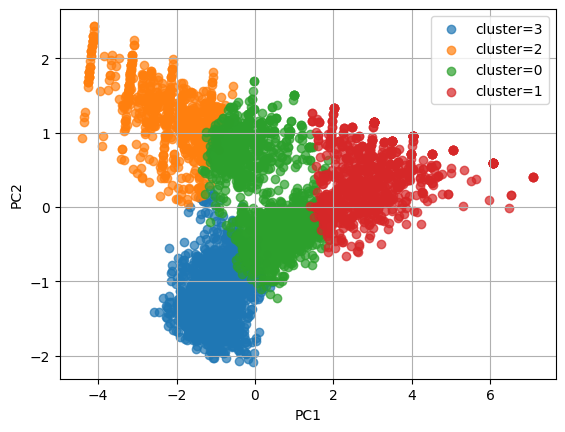

In [20]:
%matplotlib inline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 4クラスタを見やすくするため、主成分分析を使って、次元縮約する
X = customer_clustering_sc
pca = PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df["cluster"] = customer_clustering["cluster"]

# PCA結果出力
print("--- 因子付加率 ---")
print(pca.explained_variance_ratio_)
print("--- 累積寄与率 ---")
print(sum(pca.explained_variance_ratio_))

# 第1主成分と第2主成分の負荷量をDataFrameで表示
index = ['PC{}'.format(x + 1) for x in range(len(pca.components_))]
loadings_df = pd.DataFrame(pca.components_, columns=["月内平均値","月内中央値","月内最大値", "月内最小値","会員期間"], index=index)
print("--- 主成分の重みベクトル ---")
print(loadings_df)

# 4クラスタリングのPCA結果のグラフ(散布図)表示

# 軸に名前をつける
plt.xlabel(f"PC1")
plt.ylabel(f"PC2")
plt.grid()

for i in customer_clustering["cluster"].unique():
  tmp = pca_df.loc[pca_df["cluster"]==i]
  plt.scatter(tmp[0], tmp[1], label='cluster='+str(i), alpha=.7)
  plt.legend()

累積寄与率 = $0.8798019226142049$ より、第1主成分と第2主成分でクラスタの特徴をほぼ把握できる。

また、第一主成分と第二主成分の重みベクトルより、第一主成分は月間の購入量を、第二主成分は、会員期間の短さを示している。

### 得られたクラスタの考察

主成分分析の結果のクラスタごとの散布図より、各クラスタは以下のような特徴を持つと言える。

- クラスタ0: 会員期間がある程度あり、利用回数は全体の平均に近い
- クラスタ1: 会員期間がある程度あり、利用回数が多い
- クラスタ2: 会員期間が短く、利用回数も少ない
- クラスタ3: 会員期間は長いが、利用回数は平均を下回る

## 凝集型階層的クラスタリング

ユークリッド距離を用いて、3種類のクラスタ間の距離を比較する。

### `csv`データの読み込み

In [52]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# データ読込み
customer = pd.read_csv('data/customerData.txt')

#分析に使うデータを設定
customer_clustering = customer[["mean", "median","max", "min", "membership_period"]].copy()
customer_clustering.head()

# データ標準化
sc = StandardScaler()
customer_clustering_sc = sc.fit_transform(customer_clustering)

customer

,customer_id,mean,median,max,min,membership_period
0,OA832399,4.833333,5.0,8,2,47
1,PL270116,5.083333,5.0,7,3,47
2,OA974876,4.583333,5.0,6,3,47
3,HD024127,4.833333,4.5,7,2,47
4,HD661448,3.916667,4.0,6,1,47
...,...,...,...,...,...,...
4187,HD676663,8.000000,8.0,8,8,1
4188,HD246549,10.000000,10.0,10,10,1
4189,GD037007,8.000000,8.0,8,8,1
4190,OA953150,11.000000,11.0,11,11,1


### 単連結法(single)

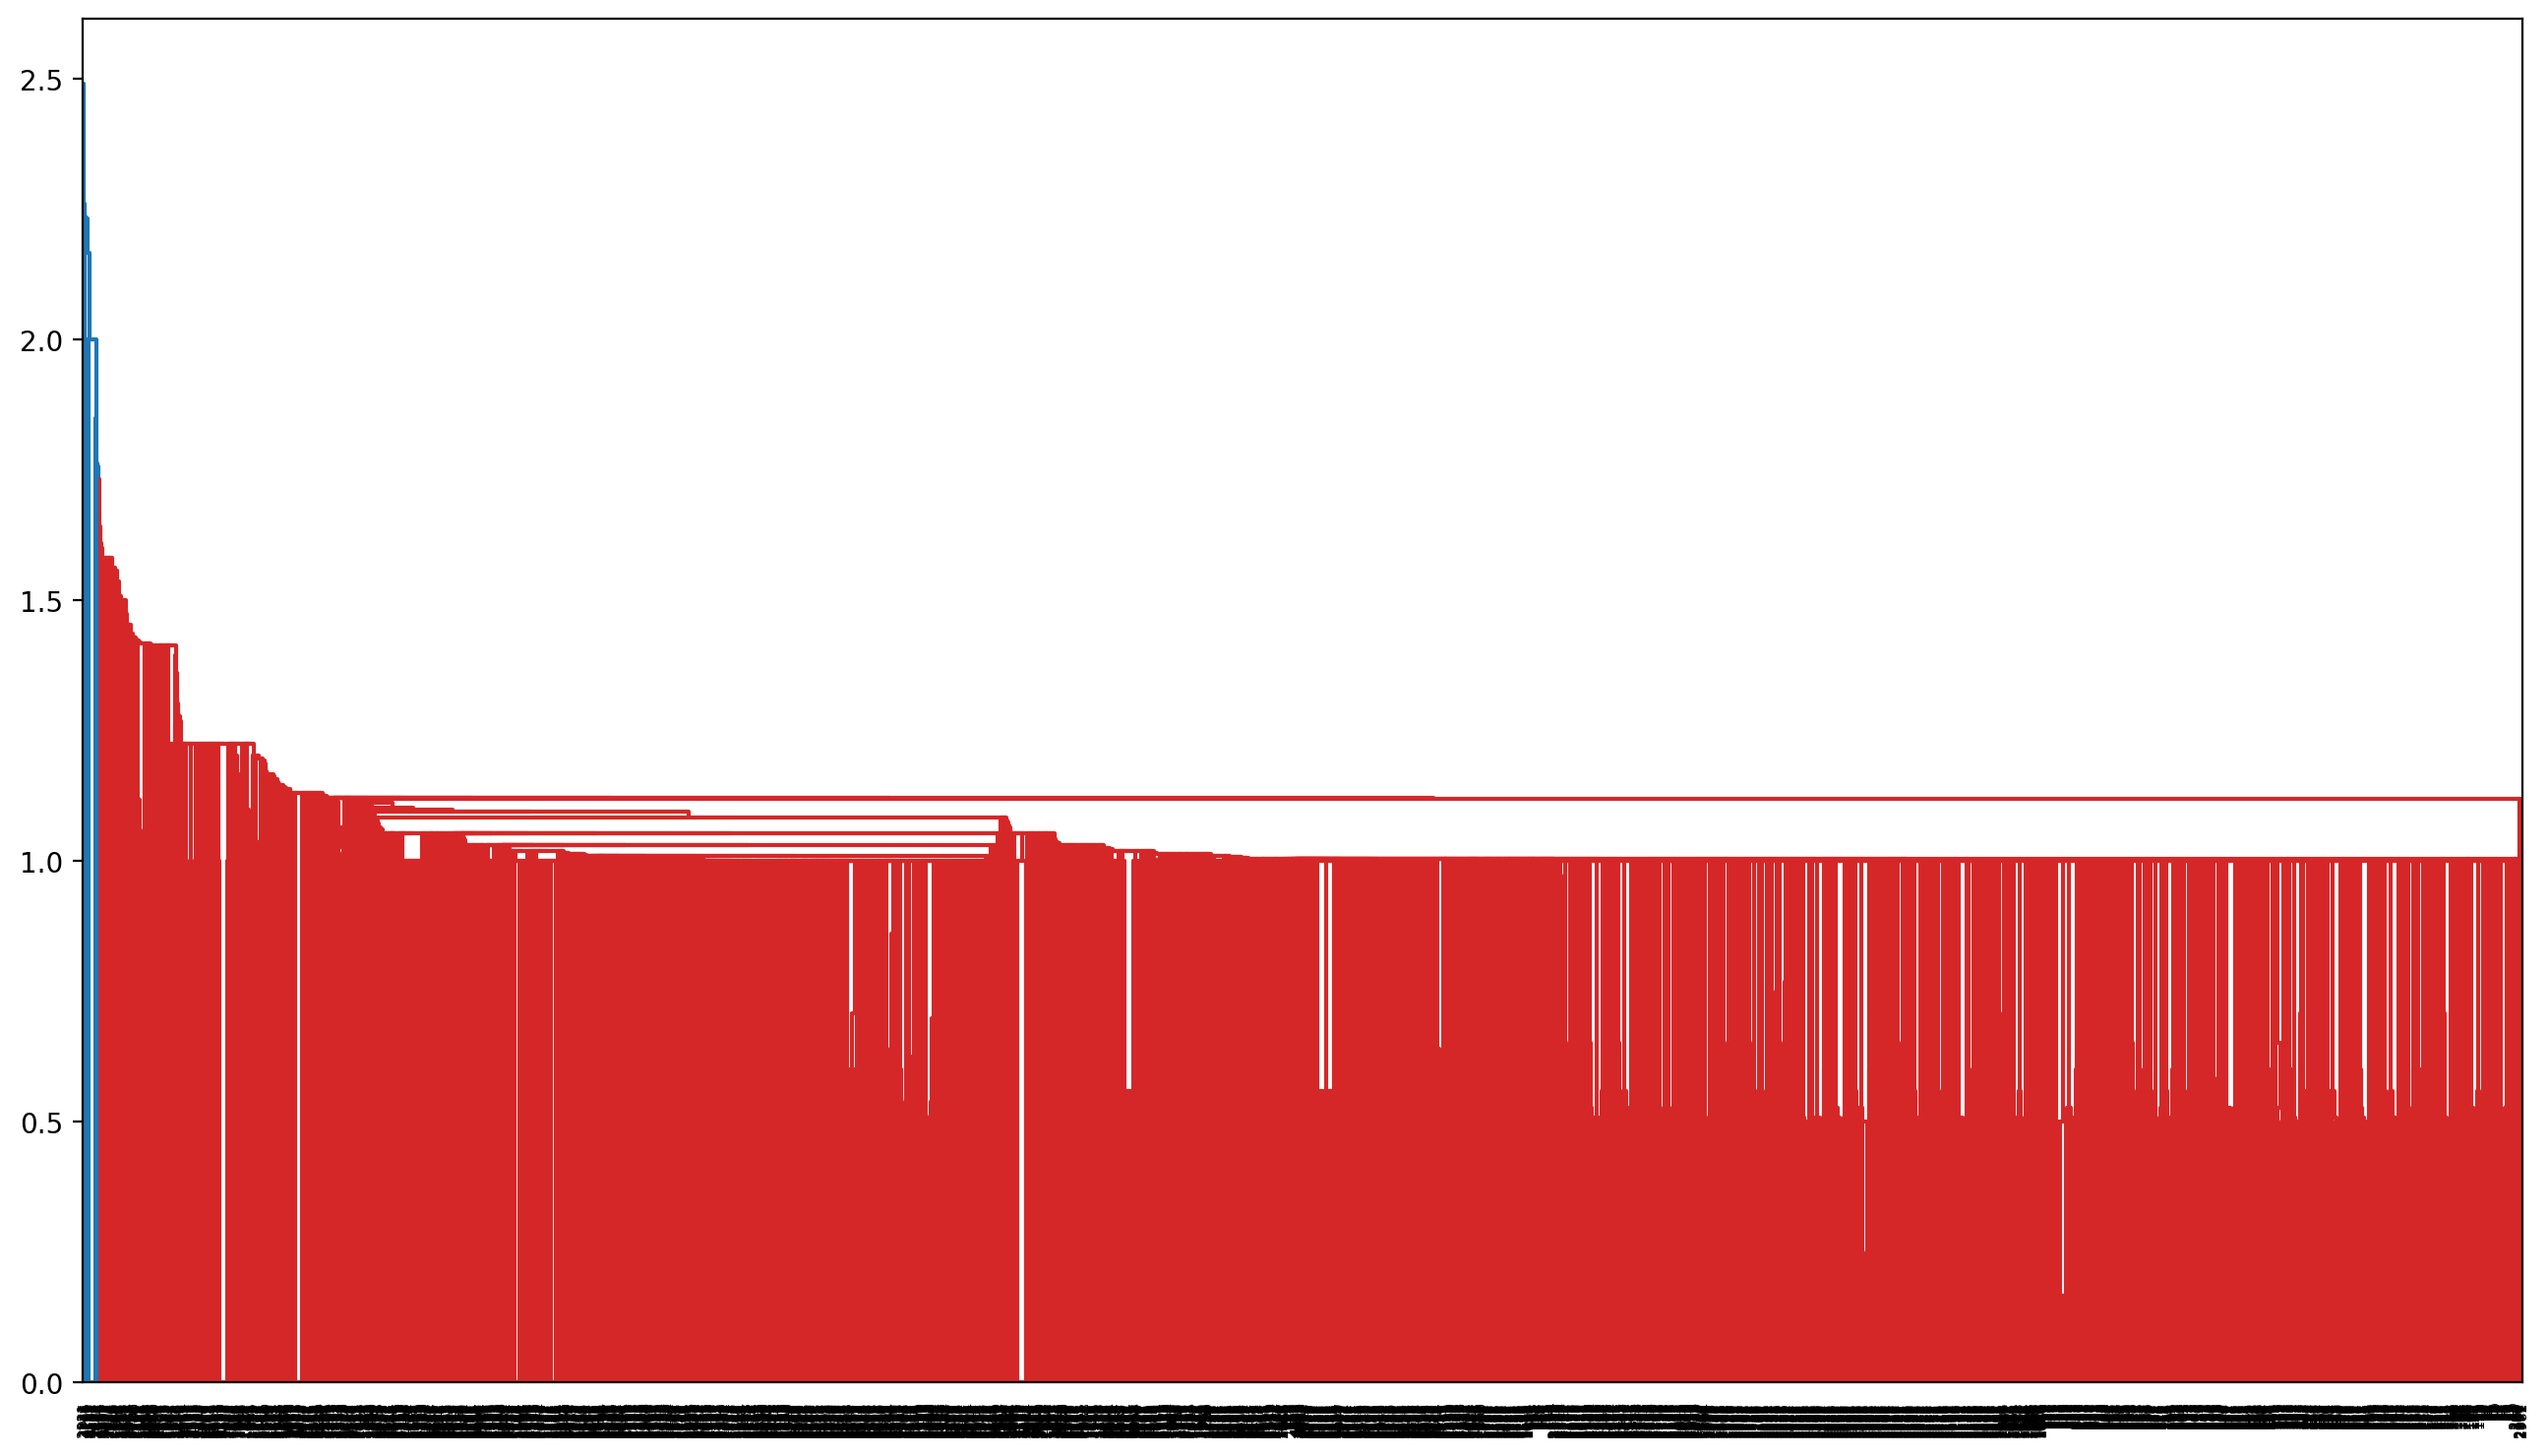

In [42]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# 階層クラスタリング実行
cls_result = linkage(customer_clustering,metric = 'euclidean',method="single")

# デンドログラム表示
plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
dendrogram(cls_result, labels=customer_clustering.index)
plt.show()

### 完全連結法(complete)

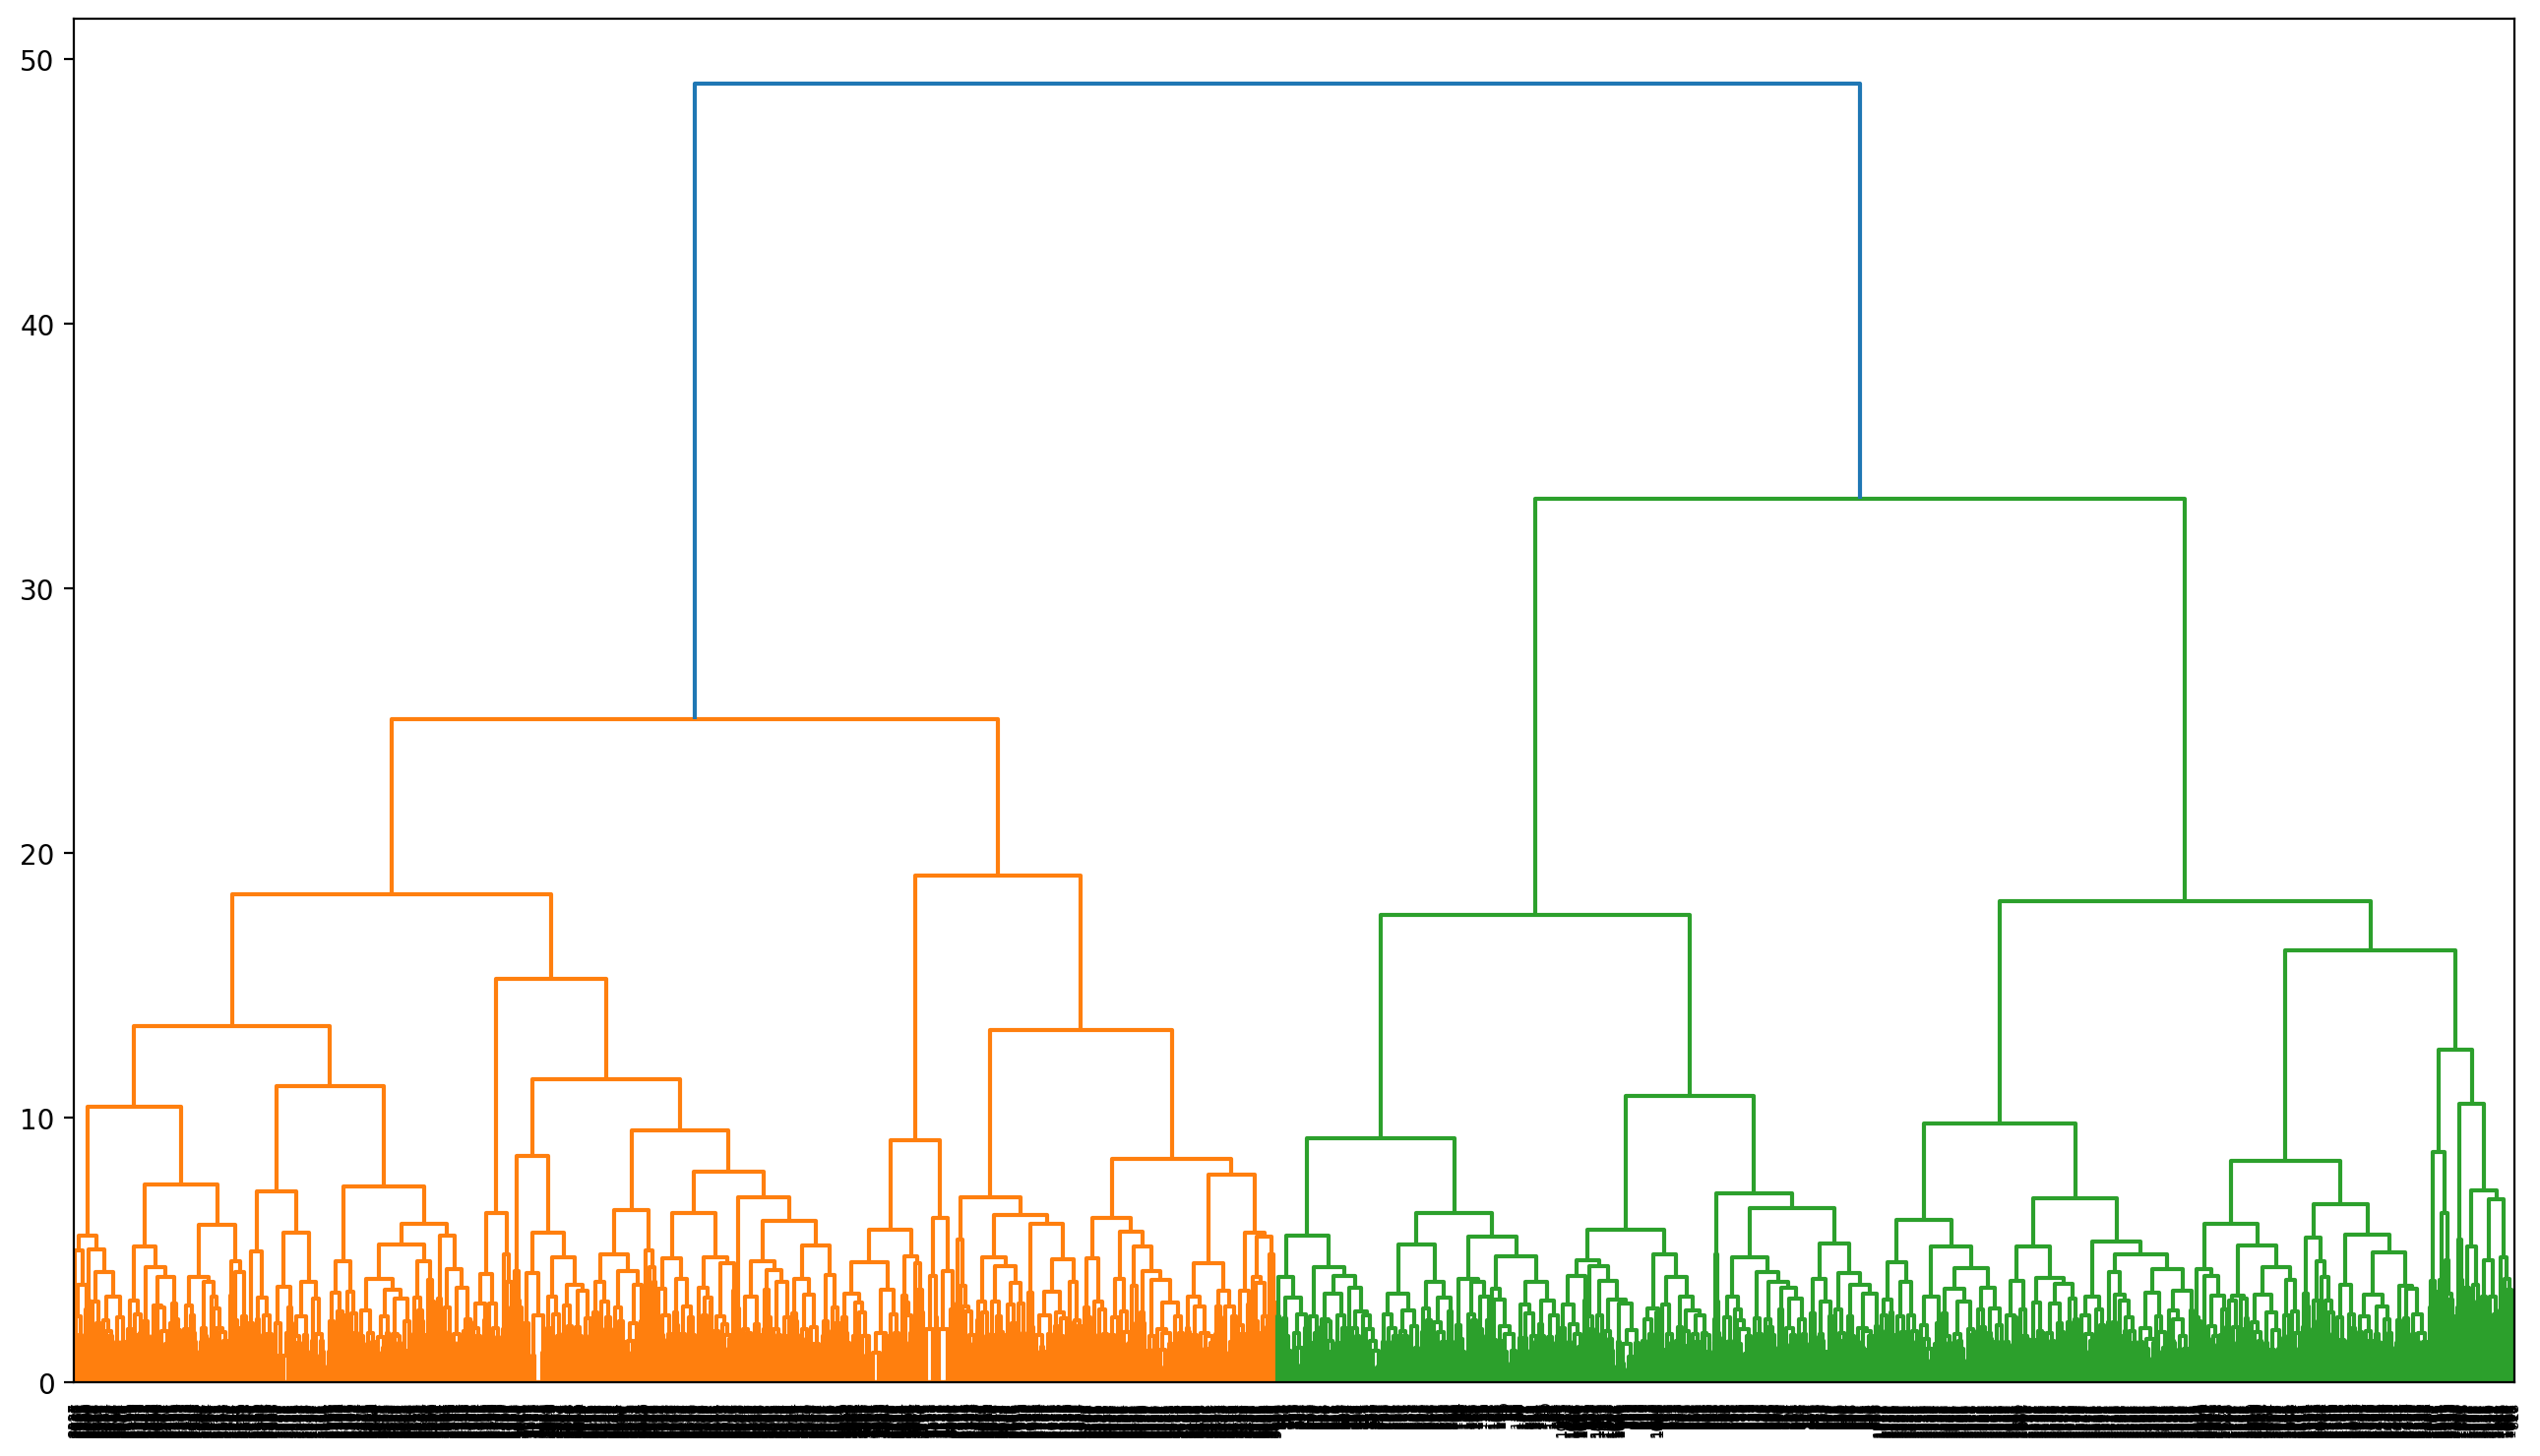

In [44]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# 階層クラスタリング実行
cls_result = linkage(customer_clustering,metric = 'euclidean',method="complete")

# デンドログラム表示
plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
dendrogram(cls_result, labels=customer_clustering.index)
plt.show()

### 群平均法(UPGMA)

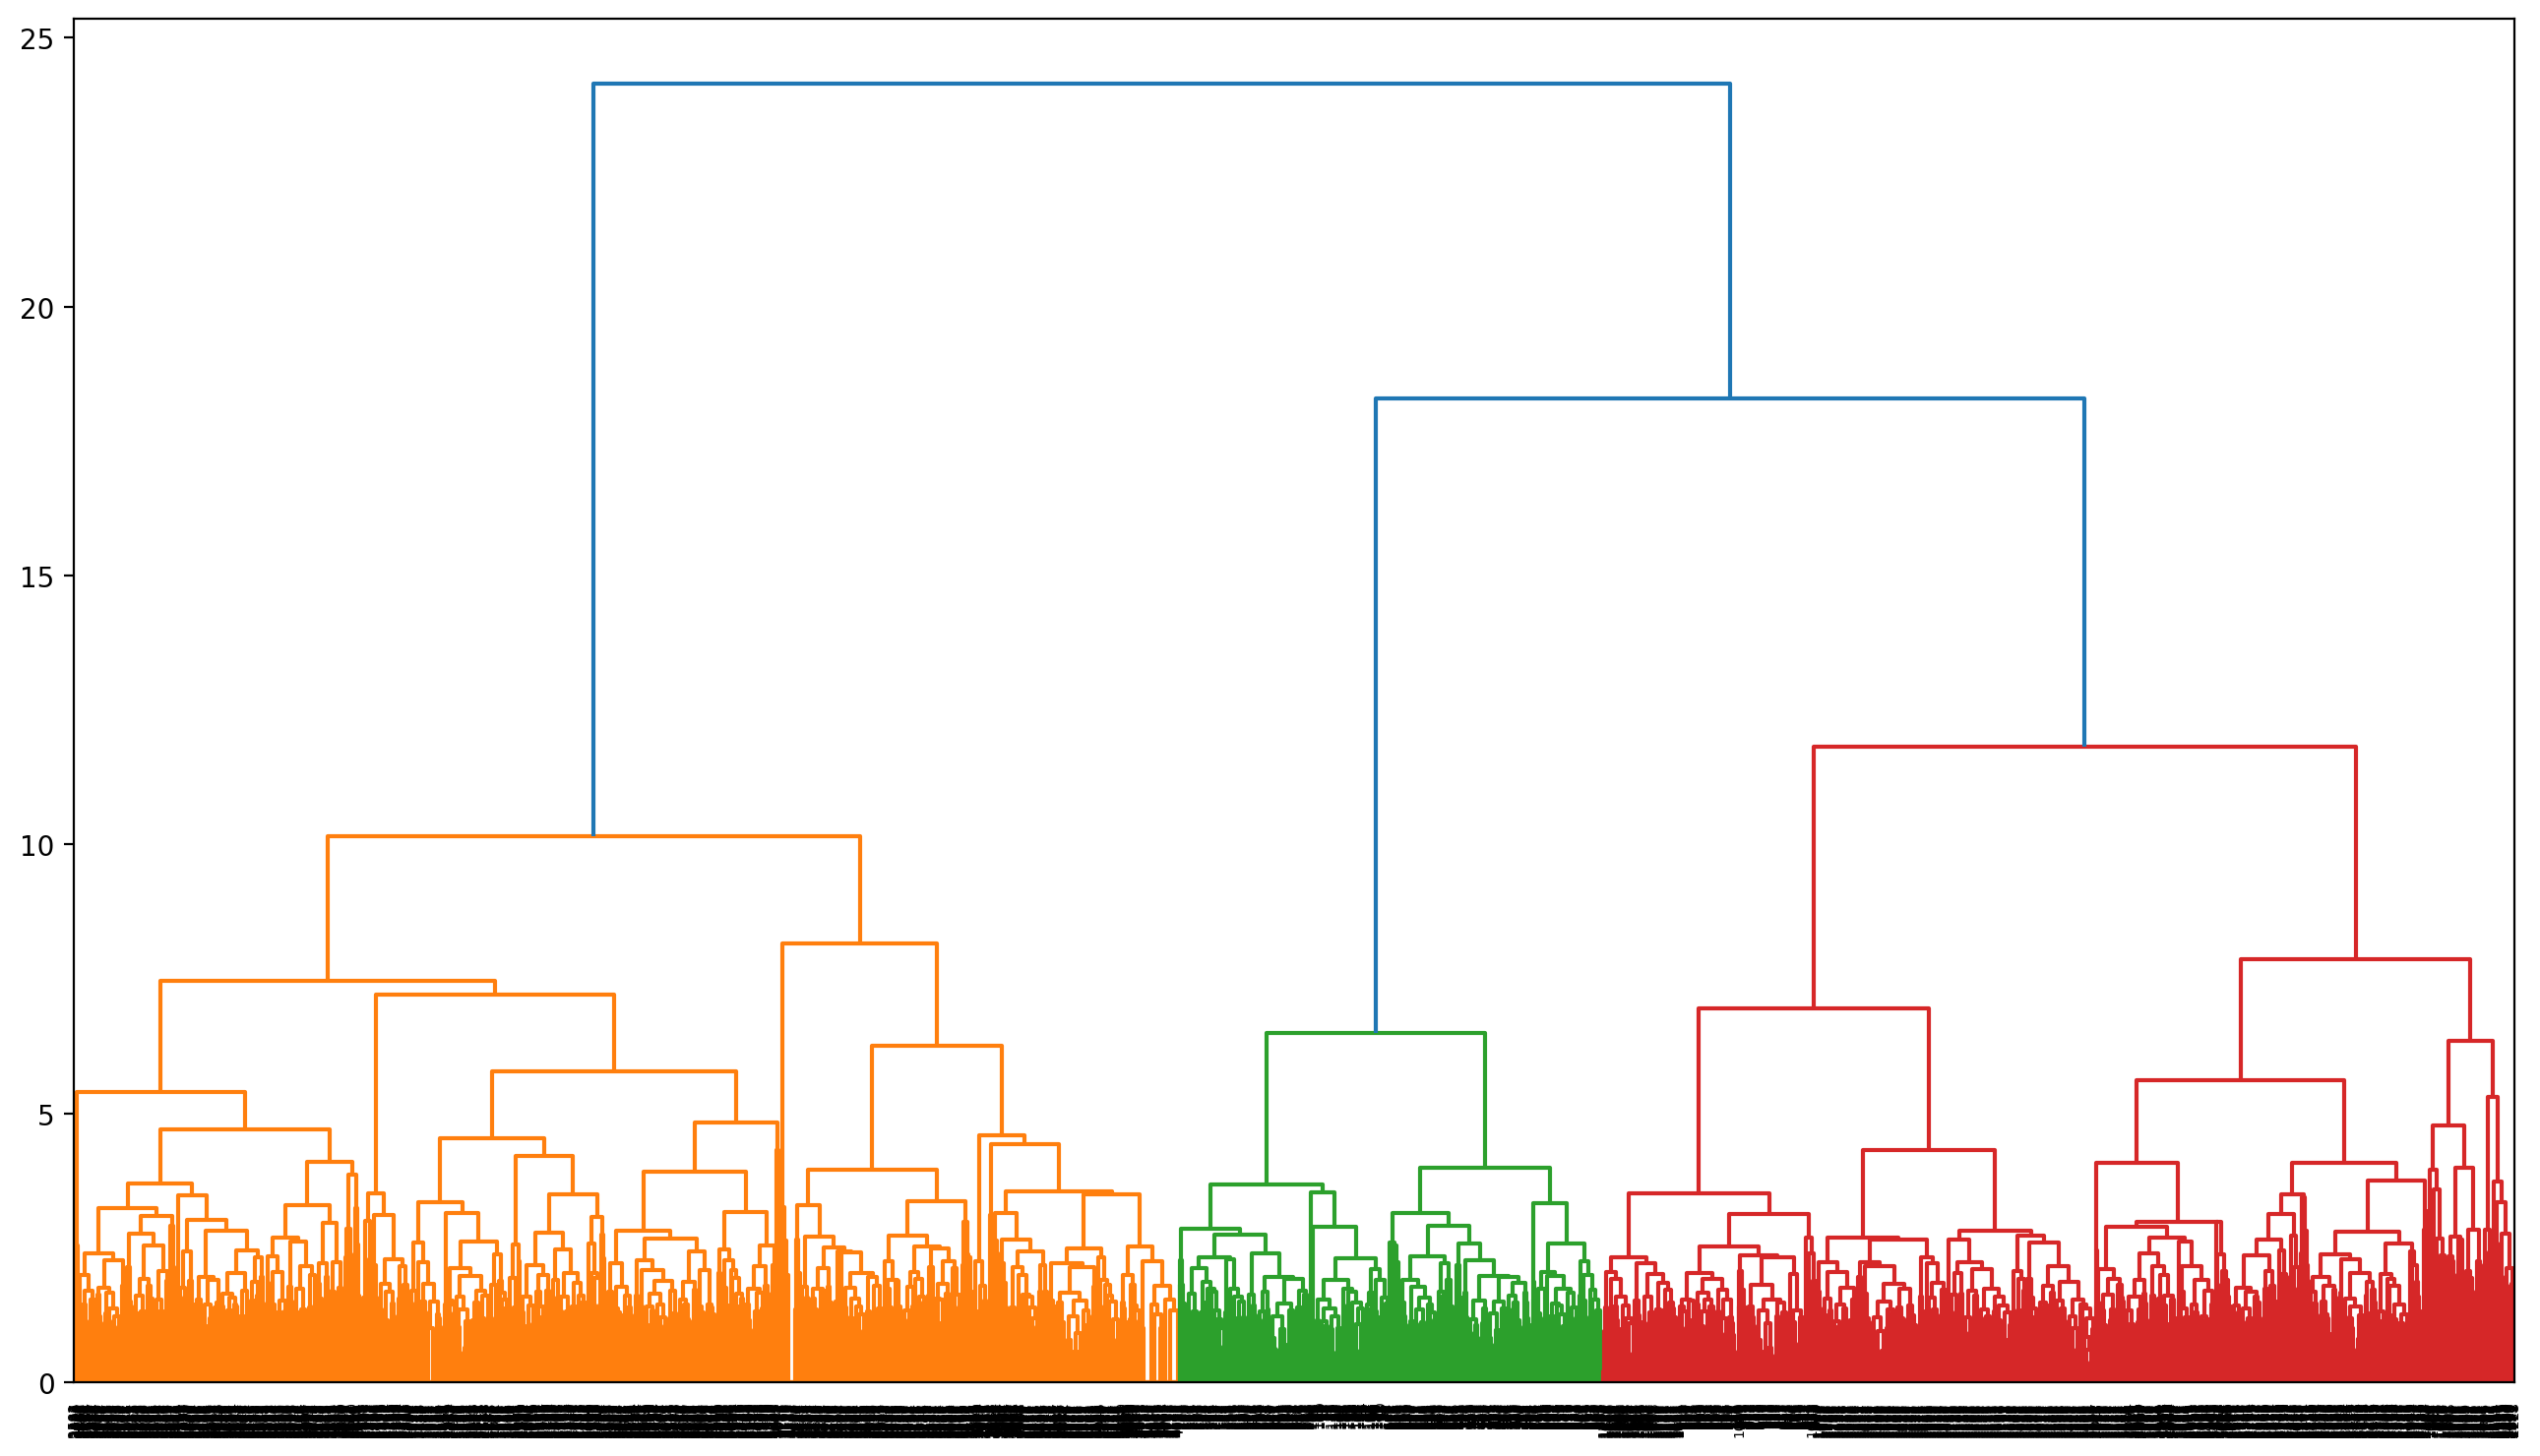

In [47]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# 階層クラスタリング実行
cls_result = linkage(customer_clustering,metric = 'euclidean',method="average")

# デンドログラム表示
plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
dendrogram(cls_result, labels=customer_clustering.index)
plt.show()

upgma_cls_result = cls_result

In [48]:
# クラスタ分けするしきい値を決める
threshold = 0.45 * np.max(cls_result[:, 2])

# クラスタを取得
clustered = fcluster(cls_result, threshold, criterion='distance')

customer_clustering["cluster"]= clustered
print(customer_clustering["cluster"].unique())
customer_clustering

[2 4 3 1]


,mean,median,max,min,membership_period,cluster
0,4.833333,5.0,8,2,47,2
1,5.083333,5.0,7,3,47,2
2,4.583333,5.0,6,3,47,2
3,4.833333,4.5,7,2,47,2
4,3.916667,4.0,6,1,47,2
...,...,...,...,...,...,...
4187,8.000000,8.0,8,8,1,1
4188,10.000000,10.0,10,10,1,1
4189,8.000000,8.0,8,8,1,1
4190,11.000000,11.0,11,11,1,1


### クラスタ内のデータの個数

空間濃縮や空間拡散が過度に発生していないことを確認する。

In [49]:
# クラスタ毎のデータ数を出力
customer_clustering.columns = ["月内平均値","月内中央値",
"月内最大値", "月内最小値","会員期間", "cluster"]
customer_clustering.groupby("cluster").count()

,月内平均値,月内中央値,月内最大値,月内最小値,会員期間
cluster,,,,,
1,1899,1899,1899,1899,1899
2,728,728,728,728,728
3,846,846,846,846,846
4,719,719,719,719,719


### クラスタごとの平均値

大まかにクラスタの特徴を把握する。

In [50]:
# クラスタ毎の平均を出力
customer_clustering.groupby("cluster").mean()

,月内平均値,月内中央値,月内最大値,月内最小値,会員期間
cluster,,,,,
1,5.475958,5.301211,7.797788,3.521327,6.263296
2,4.533654,4.508929,7.096154,2.076923,41.458791
3,5.212076,5.223404,7.819149,2.601655,28.639480
4,5.907800,5.899861,8.635605,3.267038,17.600834


--- 因子付加率 ---
[0.69042666 0.18937526]
--- 累積寄与率 ---
0.8798019226142061
--- 主成分の重みベクトル ---
        月内平均値     月内中央値     月内最大値     月内最小値      会員期間
PC1  0.532650  0.513845  0.441831  0.470014 -0.190050
PC2 -0.109719 -0.149198 -0.236745  0.127829 -0.945153


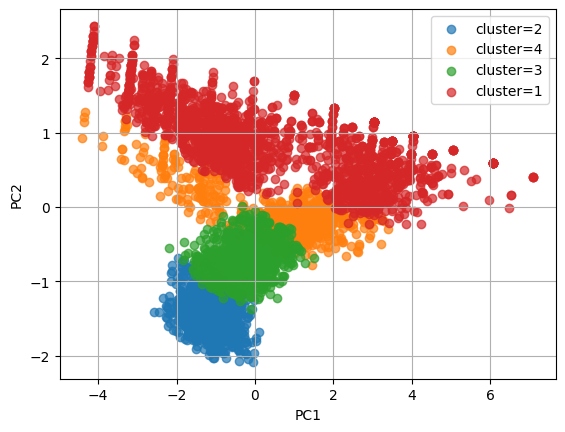

In [51]:
%matplotlib inline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 4クラスタを見やすくするため、主成分分析を使って、次元縮約する
X = customer_clustering_sc
pca = PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df["cluster"] = customer_clustering["cluster"]

# PCA結果出力
print("--- 因子付加率 ---")
print(pca.explained_variance_ratio_)
print("--- 累積寄与率 ---")
print(sum(pca.explained_variance_ratio_))

# 第1主成分と第2主成分の負荷量をDataFrameで表示
index = ['PC{}'.format(x + 1) for x in range(len(pca.components_))]
loadings_df = pd.DataFrame(pca.components_, columns=["月内平均値","月内中央値","月内最大値", "月内最小値","会員期間"], index=index)
print("--- 主成分の重みベクトル ---")
print(loadings_df)

# 4クラスタリングのPCA結果のグラフ(散布図)表示

# 軸に名前をつける
plt.xlabel(f"PC1")
plt.ylabel(f"PC2")
plt.grid()

for i in customer_clustering["cluster"].unique():
  tmp = pca_df.loc[pca_df["cluster"]==i]
  plt.scatter(tmp[0], tmp[1], label='cluster='+str(i), alpha=.7)
  plt.legend()

累積寄与率 = $0.8798019226142049$ より、第1主成分と第2主成分でクラスタの特徴をほぼ把握できる。

また、第一主成分と第二主成分の重みベクトルより、第一主成分は月間の購入量を、第二主成分は、会員期間の短さを示している。

### 得られたクラスタの考察

主成分分析の結果のクラスタごとの散布図より、各クラスタは以下のような特徴を持つと言える。

- クラスタ1: 会員期間が短く、利用回数は幅広い
- クラスタ2: 会員期間が少しあり、利用回数は平均あたりかそれより少ない
- クラスタ3: 会員期間がある程度あり、利用回数は平均に近い
- クラスタ4: 会員期間は長いが、利用回数は平均より少ない

## $k$-meansと群平均法クラスタの比較

### クラスタの形状

$k$-means法で得られたクラスタは、会員期間と利用回数の両方 - 二つの主成分を同じだけ考慮して球状になっている。対して、群平均法で得られたクラスタは、会員期間を重視して層になっている。

### クラスタの大きさのばらつき

$k$-means法で得られたクラスタは、クラスタの大きさが群平均法で得られたクラスタより均等であった。